# Heart Disease Clustering Tutorial 



In [1]:
#jUST A LIBRARY FOR PLOTTING CONFUSION MATRIX
#https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Import libraries

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, I will use the `sklearn` library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.model_selection import train_test_split

### Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset is now loaded into the variable `dataset`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

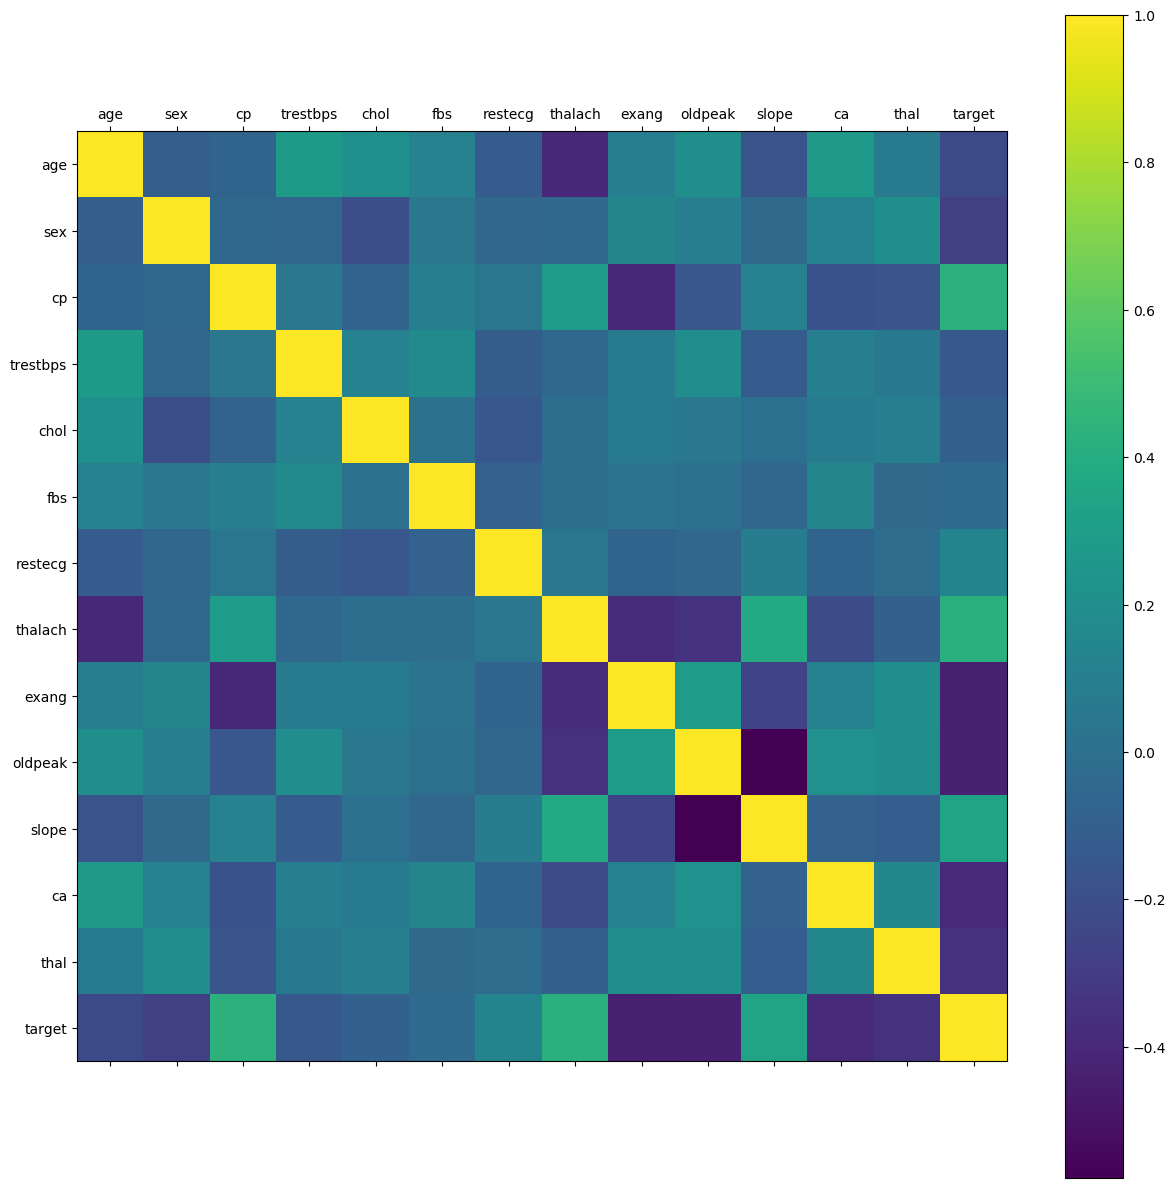

In [7]:
rcParams['figure.figsize'] = 10,15
rcParams["figure.dpi"]= 100
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001783D767438>,
      dtype=object)

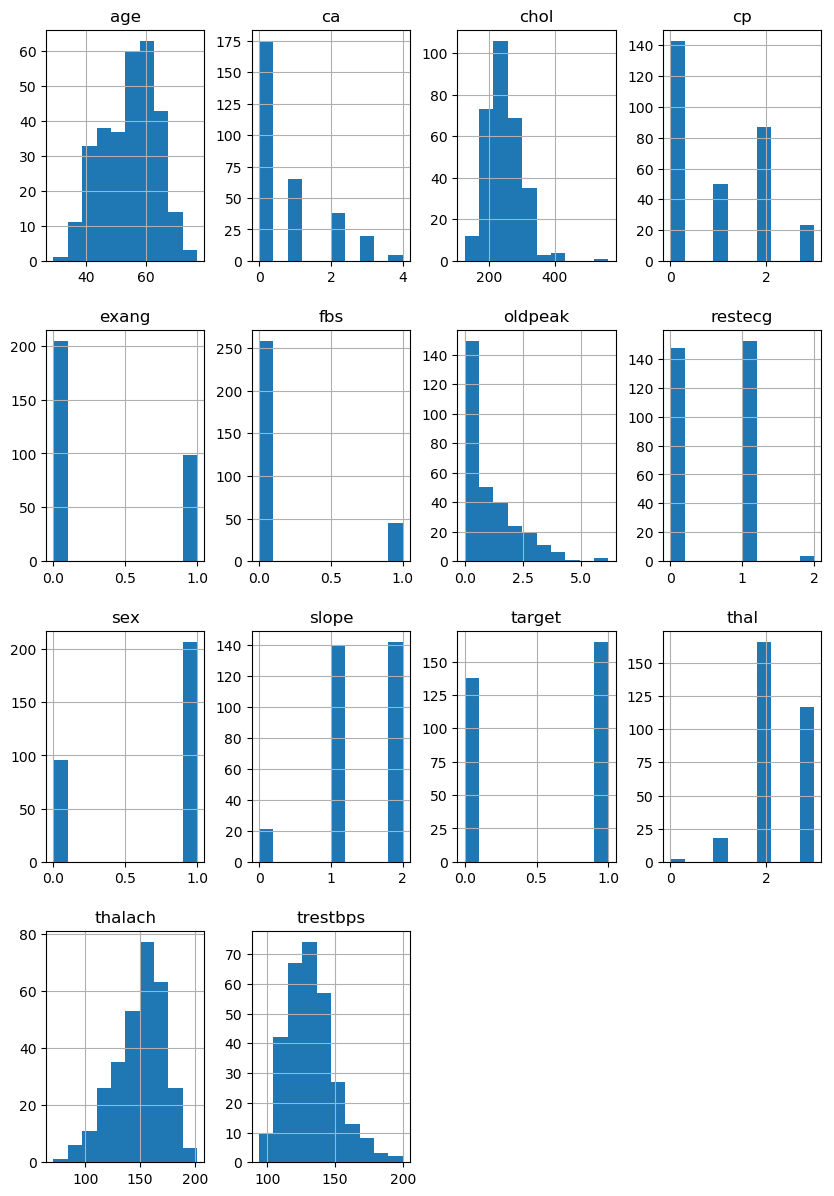

In [8]:
dataset.hist()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

In [9]:
dataset['target'].unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

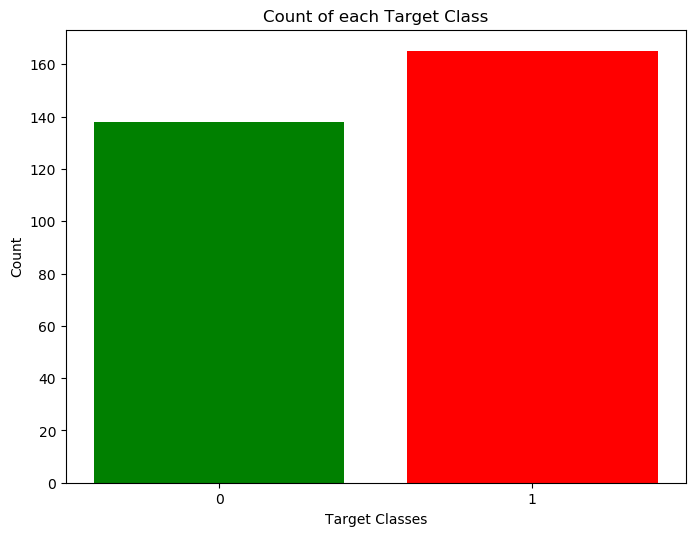

In [10]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

The data is not ready for our Machine Learning application.



### Machine Learning

I'll now import `train_test_split` to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#This is the preprocessing
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

#Read the data
y_train = dataset['target']
X_train = dataset.drop(['target'], axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Clustering Kmeans

Here, I'll use the Kmeans mutiple time to view the best number of clusters

In [14]:
#This part will just show you the training data after being pre-processed, you can delete
X_train.to_excel("Training_Clustering.xlsx") 

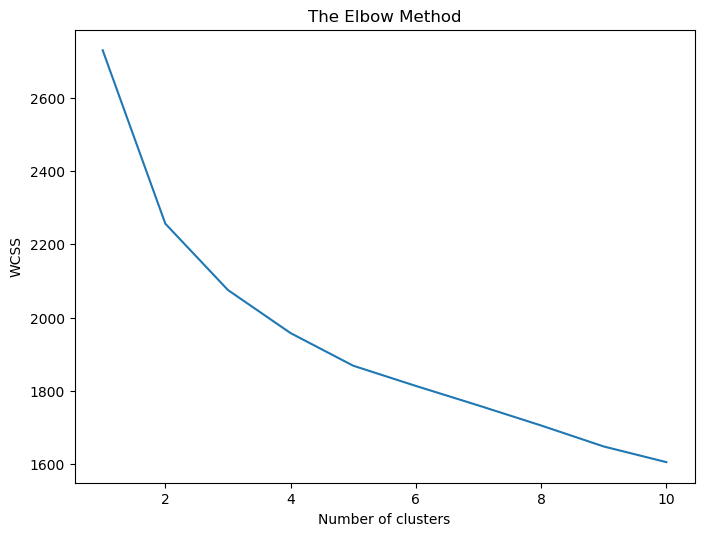

In [15]:
#Names=list(X_train.columns.values)
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter=800)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)#Thus is the WCSS of the trained clustering mdoel
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#Within Cluster sum of square
plt.show()

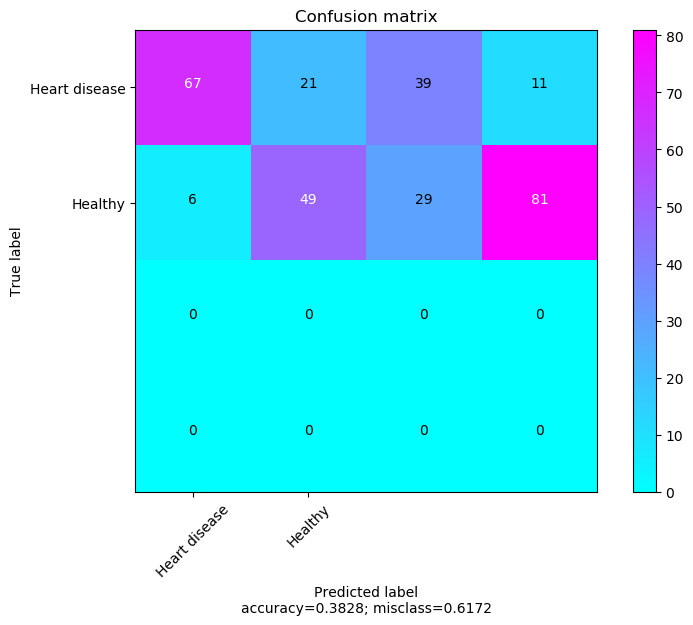

In [16]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)


from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_train, y_kmeans)

plot_confusion_matrix(cm1,
                          ["Heart disease","Healthy"], # use ytrain.unique to know order of labels--No need for labels in unsupervised questions
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)



In [ ]:
#Write output to excel
y_train 
FF=pd.DataFrame({'True Value':y_train,'Cluster Results':y_kmeans})
FF.to_excel("output_Clustering.xlsx")  

In [ ]:
#How predicti using our models
kmeans.predict([[0.95, 0.76, -0.25, 0.015, 1.087, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]])
